In [1]:
from Wind.Private.DBConfig import mongoconnection
from pymongo import MongoClient
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [2]:
client = MongoClient(mongoconnection.server)
db = client[mongoconnection.db]
db.authenticate(mongoconnection.user, password=mongoconnection.passwd)
col = db[mongoconnection.col]


In [3]:
colors = {'regdir':'b', 'seq2seq':'r', 'mlps2s': 'g', 'convo': 'c', 'mlpdir': 'y', 'svmdir':'m'}

def find_exp(query):
    return col.find(query)

def count_exp(query):
    print(col.count(query))
    
    
def compare_exp(lexp, n=10):
    
    fig = plt.figure(figsize=(16, 10), dpi=100)

    axes = fig.add_subplot(1, 2, 1)

    ldiff = {'regdir':[], 'seq2seq':[], 'mlps2s':[],'convo':[],'mlpdir':[],'svmdir':[]}
    
    
    for exp in lexp:
        data = np.array(exp['result'])
        ldiff[exp['arch']['mode']].append((np.sum(data[:,1]), exp))
        axes.plot(data[:,0], data[:,1],colors[exp['arch']['mode']])

    axes = fig.add_subplot(1, 2, 2)
    besta = {}
    for type in ldiff:
        print(type)
        besta[type] = [b[1] for b in sorted(ldiff[type], reverse=True)[:n]]
        

        for exp in besta[type]:
            
            data = np.array(exp['result'])
            axes.plot(data[:,0], data[:,1], colors[exp['arch']['mode']])
            axes.plot(data[:,0], data[:,3], colors[exp['arch']['mode']]+'--')
            
    return besta

    

In [9]:
query1= {'status':'done', 
         'arch.mode':'seq2seq',
             #   'data.lag':32, 
             # 'data.dataset':3, 
               # 'data.vars': [0,1,2,3],
              #  'arch.neurons': 32, 
               # 'arch.drop':0.1,
              #  'arch.rnn':'GRU',
               # 'arch.bidirectional':False,
               # 'arch.activation':'tanh'
               }

In [10]:
count_exp(query1)

1008


In [11]:
res1= find_exp(query1)

#print res1['arch']

regdir
seq2seq
mlps2s
convo
mlpdir
svmdir


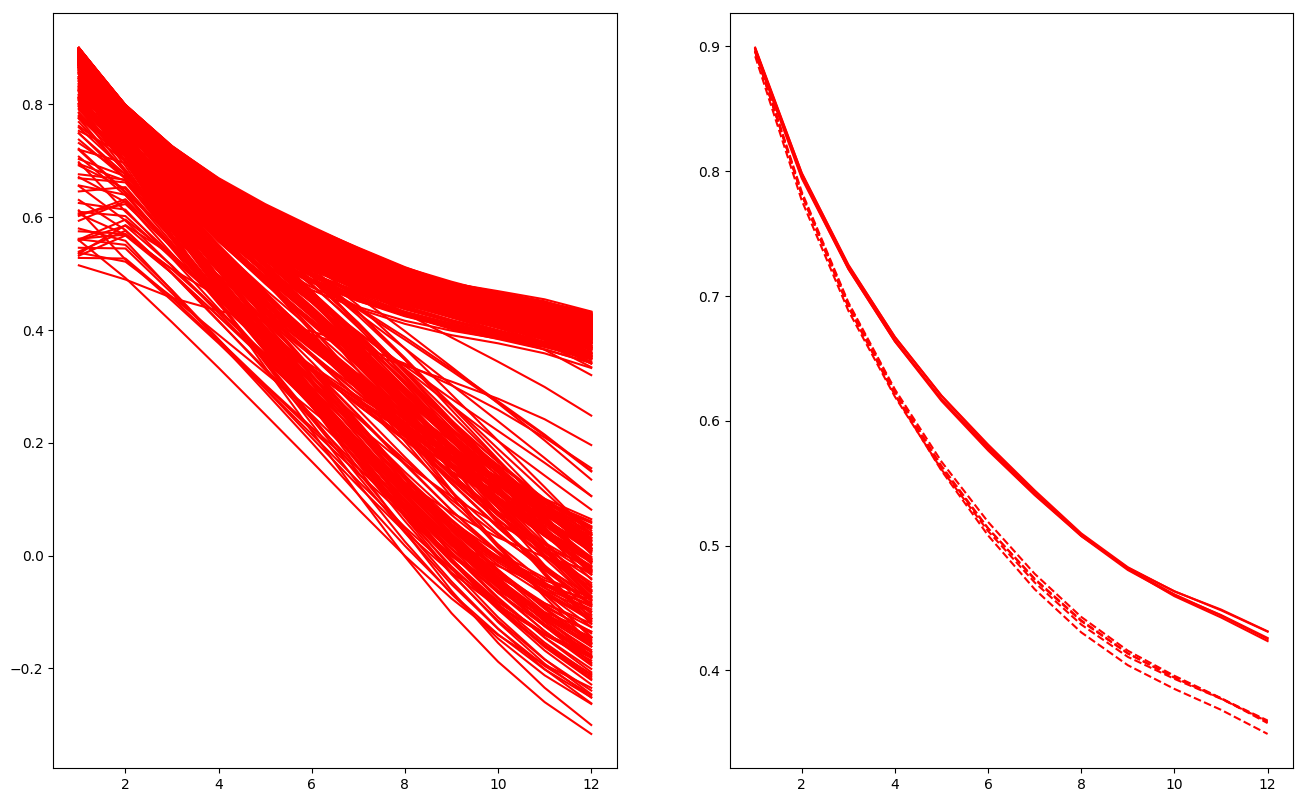

In [12]:
best = compare_exp(res1, n=5)

In [14]:
i=1
type = 'seq2seq'

print('ID:', best[type][i]['_id'])
print('DS:', best[type][i]['data']['dataset'])
print('LAG:', best[type][i]['data']['lag'])
print('VARS:', best[type][i]['data']['vars'])
if 'svm' in best[type][i]['arch']['mode']:
    print('MODE:', best[type][i]['arch']['mode'])
    print('C:', best[type][i]['arch']['C'])   
    print('Kernel:', best[type][i]['arch']['kernel'] )
    print('Eps:', best[type][i]['arch']['epsilon'] )
    print('Deg:', best[type][i]['arch']['degree'] )
    print('coef0:', best[type][i]['arch']['coef0'] )    
else:
    print('MODE:', best[type][i]['arch']['mode'])
    print('RNN:', best[type][i]['arch']['rnn'] if 'rnn' in best[type][i]['arch'] else '')
    print('NLY:', best[type][i]['arch']['nlayers'])
    print('NLYE:', best[type][i]['arch']['nlayersE'] if 'nlayersE' in best[type][i]['arch'] else '')
    print('NLYD', best[type][i]['arch']['nlayersD'] if 'nlayersD' in best[type][i]['arch'] else '') 
    print('NNEUR:', best[type][i]['arch']['neurons'] if 'neurons' in best[type][i]['arch'] else '')
    print('NNEURD:', 0 if not 'neuronsD' in  best[type][i]['arch'] else best[type][i]['arch']['neuronsD'])
    print('DROP:', best[type][i]['arch']['drop'])
    print('BI:',best[type][i]['arch']['bidirectional'] if 'bidirectional' in best[type][i]['arch'] else '')
    print('FILT:', best[type][i]['arch']['filters'] if 'filters' in best[type][i]['arch'] else '')
    print('STRD:', best[type][i]['arch']['strides'] if 'strides' in best[type][i]['arch'] else '')
    print('KERSIZ:', best[type][i]['arch']['kernel_size'] if 'kernel_size' in best[type][i]['arch'] else '')    
    print('ACT:', best[type][i]['arch']['activation'])    
    print('OPT:', best[type][i]['training']['optimizer'])
    print('FULLLY:', best[type][i]['arch']['full'])
 
print(np.array(best[type][i]['result'])[:,1])

ID: 1523019498
DS: 1
LAG: 18
VARS: [0, 1, 2, 3, 4, 5]
MODE: seq2seq
RNN: GRU
NLY: 2
NLYE: 1
NLYD 1
NNEUR: 96
NNEURD: 0
DROP: 0.3
BI: False
FILT: 
STRD: 
KERSIZ: 
ACT: relu
OPT: adamax
FULLLY: [1]
[0.89899301 0.798462   0.72507996 0.66686598 0.6198762  0.58000881
 0.54321631 0.50895831 0.48115099 0.45941757 0.44238083 0.42344695]


In [ ]:
i=0
for type in best:
    print(type, np.array(best[type][i]['result'])[:,1])  